# The question they need me is estimated diamonds value, and predict values

In [152]:
!pip install seaborn

## python version:



In [153]:
import sys
print(sys.version)

3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:48:34) [MSC v.1929 64 bit (AMD64)]


# Import librarys

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# extract and exploring data

In [155]:
import zipfile
with zipfile.ZipFile("diamonds.zip","r") as zip_ref:
    zip_ref.extractall("/lapiradismproblem/")

In [156]:
df_diamonds = pd.read_csv("/lapiradismproblem/diamonds.csv")
df_diamonds.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [157]:
len(df_diamonds)

53930

In [158]:
df_diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [159]:
df_coords_diamonds = pd.read_csv("/lapiradismproblem/coords_diamonds.csv")
df_coords_diamonds.head(5)

,Unnamed: 0,latitude,longitude
0,0,39.8813889,-83.093056
1,1,33.4150000,-111.548889
2,2,40.1672222,-105.101389
3,3,37.3711111,-85.583056
4,4,48.5394444,-121.745000


In [160]:
len(df_coords_diamonds)

53930

In [161]:
df_coords_diamonds.dtypes

Unnamed: 0      int64
latitude       object
longitude     float64
dtype: object

In [162]:
df_diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,26964.500000,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,15568.394346,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,0.000000,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,13482.250000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26964.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40446.750000,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,53929.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [163]:
df_coords_diamonds.describe()

,Unnamed: 0,longitude
count,53930.000000,53930.000000
mean,26964.500000,-86.693792
std,15568.394346,39.773132
min,0.000000,-173.985008
25%,13482.250000,-112.073333
50%,26964.500000,-87.889167
75%,40446.750000,-78.680278
max,53929.000000,178.017649


union the data

In [164]:
df = pd.merge(df_diamonds, df_coords_diamonds, on="Unnamed: 0")
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,39.8813889,-83.093056
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,33.4150000,-111.548889
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,40.1672222,-105.101389
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,37.3711111,-85.583056
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,48.5394444,-121.745000


In [165]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## cleaning data

In [166]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'Very Goo!d',
       "P*'remium", 'I#deal', '#Very Good', 'P?remium', "*'Ideal",
       '!Good', 'Pre!mium', 'Pr?emium', 'Very Go#od', 'Ide&al', 'Ide!al',
       'Id!eal', '&Premium', 'Go?od', 'G#ood', "Very *'Good", "Ide*'al",
       'V&ery Good', '&Ideal', 'Very G#ood'], dtype=object)

In [167]:
df['cut'] = df['cut'].astype(str)
df['cut'] = df['cut'].replace(r'[^A-Za-z0-9]', '', regex=True)
df['cut'].value_counts()

cut
Ideal       21546
Premium     13788
VeryGood    12082
Good         4904
Fair         1610
Name: count, dtype: int64

In [168]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', "*'E", '#F', '&G', '!H', '?J',
       '#D', '&I', '!I', '?G', '#H', '?H', '?E', "*'F", '!E', '&F', '#G',
       "*'I", '!F', '&E'], dtype=object)

In [169]:
df['color'] = df['color'].astype(str)
df['color'] = df['color'].replace(r'[^A-Za-z0-9]', '', regex=True)
df['color'].value_counts()

color
G    11288
E     9796
F     9541
H     8304
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [170]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', 'S?I1',
       'SI!1', '&VS2', '&SI2', "S*'I1", 'VS?1', "S*'I2", '#VS1', 'V&S2',
       'V!S2', '!VS2', 'VS#2', "VVS*'2", "*'SI2", 'VV?S1', 'S&I1',
       "*'SI1", 'SI?1', 'VV#S1', 'V#S2', '#SI!1', 'S!I2'], dtype=object)

In [171]:
df['clarity'] = df['clarity'].astype(str)
df['clarity'] = df['clarity'].replace(r'[^A-Za-z0-9]', '', regex=True)
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12256
SI2      9193
VS1      8167
VVS2     5063
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [172]:
#df['carat'].unique()
#df['latitude'].unique()
#df['y'].unique() #hay valores nulos y negativos
#df['x'].unique() #valores nulos y negativos
#df['z'].unique() #valores nulos y negativos
#df['depth'].unique()
#df['price'].unique()
#df['table'].unique()
df['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

## Searching null data

In [173]:
df.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth         2962
table            0
price            0
x             1090
y              585
z                0
latitude         0
longitude        0
dtype: int64

In [174]:
df.isna().sum()

carat            0
cut              0
color            0
clarity          0
depth         2962
table            0
price            0
x             1090
y              585
z                0
latitude         0
longitude        0
dtype: int64

### loocking some pattern to null data

In [175]:
df_null_depth = df.loc[df['depth'].isnull()]
df_null_x = df.loc[df['x'].isnull()]
df_null_y = df.loc[df['y'].isnull()]

In [176]:
df_null_depth['cut'].value_counts()

cut
Ideal       1255
Premium      713
VeryGood     643
Good         260
Fair          91
Name: count, dtype: int64

In [177]:
df_null_depth['clarity'].value_counts()

clarity
VS2     709
SI1     691
SI2     492
VS1     458
VVS2    259
VVS1    215
IF      106
I1       32
Name: count, dtype: int64

### filtrered data into 2 ordinal variables and 1 nominal variable

In [178]:
df[['color', 'cut']].groupby(df['clarity']).value_counts()

clarity  color  cut    
I1       G      Fair       53
         H      Fair       52
         G      Premium    46
         H      Premium    46
         F      Ideal      42
                           ..
VVS2     H      Fair       11
         F      Fair       10
         D      Fair        9
         I      Fair        8
         J      Fair        1
Name: count, Length: 276, dtype: int64

In [179]:
df_null_depth[['color', 'cut']].groupby(df_null_depth['clarity']).value_counts()

clarity  color  cut     
I1       G      Fair        5
         F      Fair        4
         G      Premium     3
                VeryGood    3
         E      VeryGood    2
                           ..
VVS2     G      Fair        2
         H      Good        2
         J      Good        1
                Ideal       1
                VeryGood    1
Name: count, Length: 229, dtype: int64

In [180]:
#searching for specific color, cut, clarity and we ask for depth not null to calculate the mean
df_depth_g_f_vvs2 = df.loc[(df['color'] == 'G') & (df['cut'] == 'Fair') & (df['clarity'] == 'VVS2') & (df['depth'].notna()), ['depth', 'x', 'y']].mean()
mean_deth_g_f_vvs2 = df_depth_g_f_vvs2[0].astype(float)

C:\Users\CHOX\AppData\Local\Temp\ipykernel_7728\211698956.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_deth_g_f_vvs2 = df_depth_g_f_vvs2[0].astype(float)


In [181]:
df['color'][0]

'E'

In [182]:
for i in df['color'].unique():
  for j in df['cut'].unique():
    for k in df['clarity'].unique():
     #calculated mean by 3 filtered values
     mean_comb = df.loc[(df['color'] == i) & (df['cut'] == j)
                         & (df['clarity'] == k) & (df['depth'].notna()), 'depth'].mean()
     #replace null values in column depth for mean filtered
     df.loc[(df['color'] == i) & (df['cut'] == j) & (df['clarity'] == k) & (df['depth'].isna()), 'depth'] = mean_comb
df['depth'].isnull().sum()

0

### suposed x and y only have positives values, in this case I replace - for +

In [183]:
df['x'] = df['x'].abs()
df['y'] = df['y'].abs()
df['z'] = df['z'].abs()

transform null values x and y into their means

In [184]:
for i in df['color'].unique():
  for j in df['cut'].unique():
    for k in df['clarity'].unique():
     #calculated mean by 3 filtered values
     mean_comb_y = df.loc[(df['color'] == i) & (df['cut'] == j)
                         & (df['clarity'] == k) & (df['y'].notna()), 'y'].mean()
     mean_comb_x = df.loc[(df['color'] == i) & (df['cut'] == j)
                         & (df['clarity'] == k) & (df['x'].notna()), 'x'].mean()
     #replace null values in column depth for mean filtered
     df.loc[(df['color'] == i) & (df['cut'] == j) & (df['clarity'] == k) & (df['x'].isna()), 'x'] = mean_comb_x
     df.loc[(df['color'] == i) & (df['cut'] == j) & (df['clarity'] == k) & (df['y'].isna()), 'y'] = mean_comb_y


In [185]:
#df['y'].isnull().sum()
df['x'].isnull().sum()

0

In [188]:
df[df['latitude'].isna() == True]

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude


In [189]:
df['depth']

0        61.500000
1        59.800000
2        56.900000
3        62.400000
4        63.300000
           ...    
53925    60.800000
53926    63.100000
53927    62.800000
53928    61.000000
53929    61.700299
Name: depth, Length: 53930, dtype: float64

# Exploratory Data Analisys

### Note data have 9 numeric variables, 2 categorical and 1 ordinal variables
### Clarity is go the I3 to FL (i3:1,i2:2,i1:3,si2:4,si1:5,vs2:6,vs1:7,ws2:8,ws1:9,if:10,fl:11)
### cut is go the Fair:1, good:2, verygood:3, premium:4, ideal:5
### and values in ordinal variable is E, I, J, H, F, G, D

1- visualization of frequencies

In [190]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'latitude', 'longitude '],
      dtype='object')

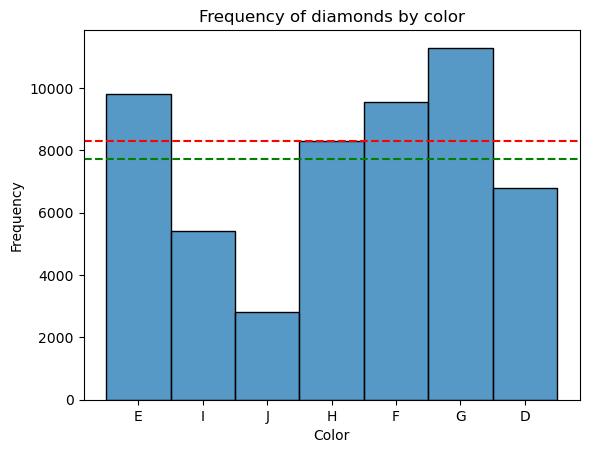

In [191]:
sns.histplot(df['color'])

plt.axhline(y=df['color'].value_counts().median(), color='r', linestyle='--', label='Mediana')
plt.axhline(y=df['color'].value_counts().mean(), color='g', linestyle='--', label='Media')

plt.title('Frequency of diamonds by color')
plt.xlabel('Color')
plt.ylabel('Frequency')

plt.show()

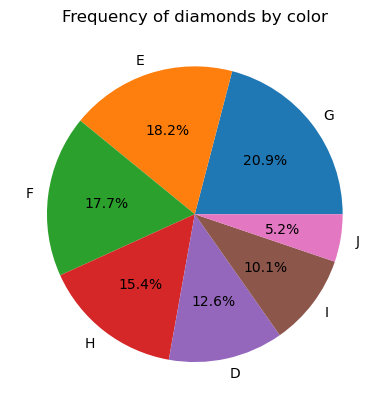

In [192]:
plt.pie(df['color'].value_counts(), labels=df['color'].value_counts().index, autopct='%1.1f%%')
plt.title('Frequency of diamonds by color')
plt.show()

Creating dictionary to categorical variables

In [193]:
clarity = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'I1': 8, 'IF':9}
cut = {'Fair': 1, 'Good': 2, 'VeryGood': 3, 'Premium': 4, 'Ideal': 5}


In [194]:
df['clarity'] = df['clarity'].map(clarity)
df['cut'] = df['cut'].map(cut)

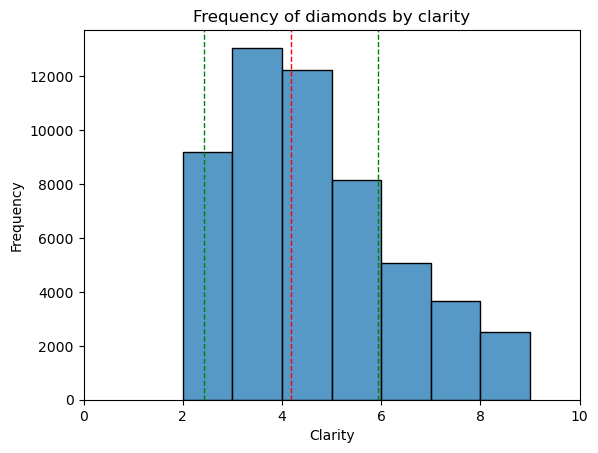

In [195]:
mean_clarity = df['clarity'].mean()
std_clarity = df['clarity'].std()

sns.histplot(df['clarity'], binwidth = 1)
plt.axvline(mean_clarity, color = 'red', linestyle='dashed', linewidth=1)
plt.axvline(mean_clarity + std_clarity, color = 'green', linestyle='dashed', linewidth=1)
plt.axvline(mean_clarity - std_clarity, color = 'green', linestyle='dashed', linewidth=1)

plt.title('Frequency of diamonds by clarity')
plt.xlim(0,10)
plt.xlabel('Clarity')
plt.ylabel('Frequency')

plt.show()

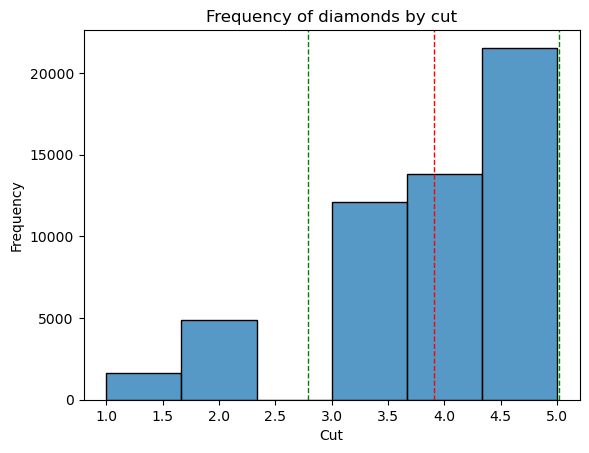

In [196]:
cut_mean = df['cut'].mean()
cut_std = df['cut'].std()

sns.histplot(df, x='cut', binwidth = 0.7)
plt.axvline(cut_mean, color = 'red', linestyle='dashed', linewidth=1)
plt.axvline(cut_mean + cut_std, color = 'green', linestyle='dashed', linewidth=1)
plt.axvline(cut_mean - cut_std, color = 'green', linestyle='dashed', linewidth=1)

plt.title('Frequency of diamonds by cut')
plt.xlabel('Cut')
plt.ylabel('Frequency')

plt.show()

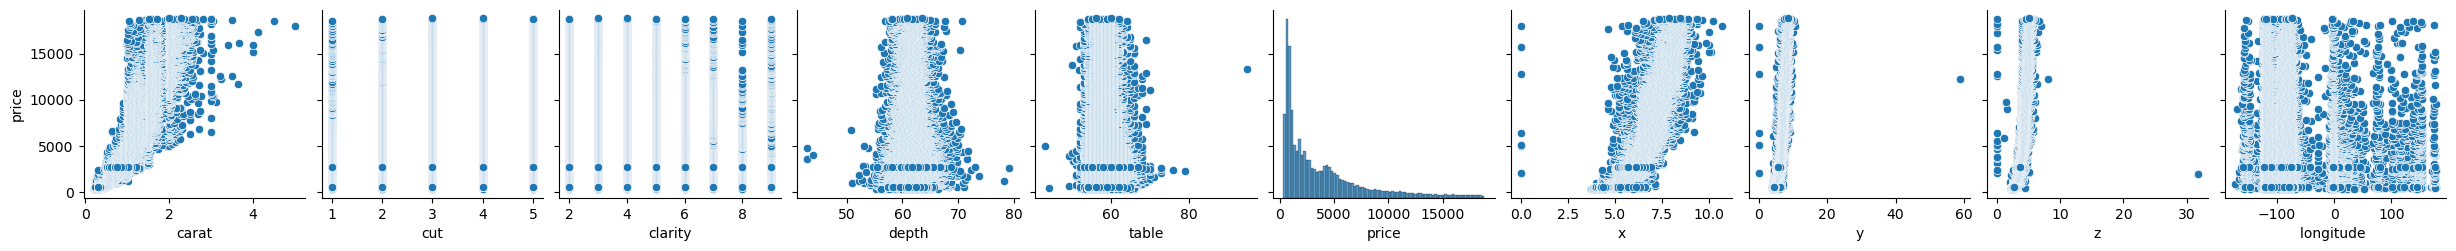

In [197]:
sns.pairplot(df, y_vars= 'price')
plt.show()

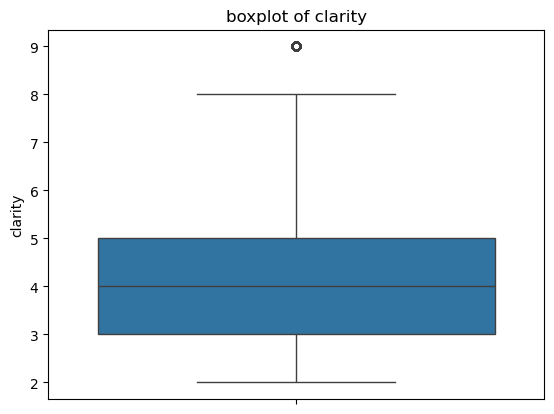

In [198]:
sns.boxplot(df['clarity'])
plt.title('boxplot of clarity')
plt.show()

I see that most of the data is distributed between 5 and 3 with a mean of 4 and for the fourth quantile we have the clarity data from 5 to 8 and it shows that 9 in the data set is atypical.

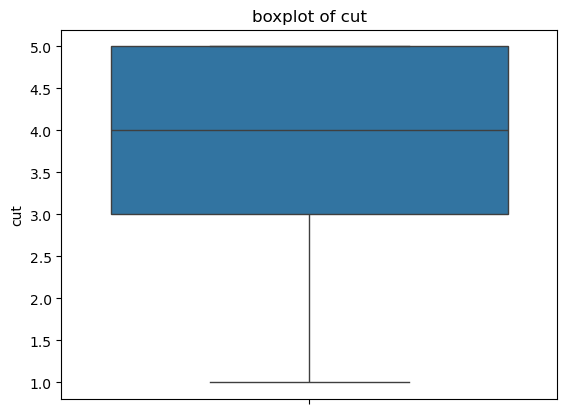

In [199]:
sns.boxplot(df['cut'])

plt.title('boxplot of cut')
plt.show()

For the cut-off, we see that the first quantile is the cut-off from 1 to 3, which are acceptable, good, and very good. While the second quantile is from 4 to 5 (very premium to ideal), with a mean of 4 (premium), and the fourth quantile must be very close to the data of the third quantile, which is why it cannot be visualized.
This box diagram does not show outliers. And it can be seen that the highest concentration of data is in the premium and ideal cut-off.

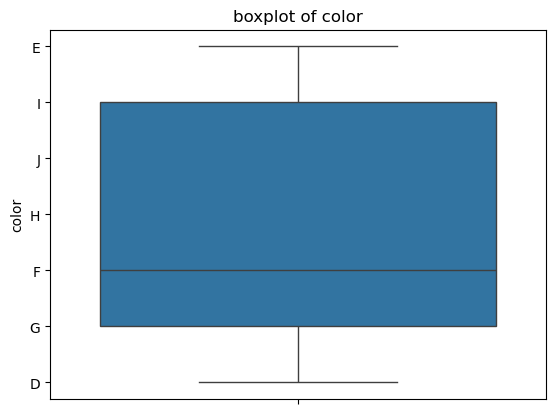

In [200]:
sns.boxplot(df['color'])
plt.title('boxplot of color')
plt.show()

It can be observed that there are no outliers, that the mean is in color F and the third quantile covers colors H, J, I, so the largest amount of data is in D, G, F, E

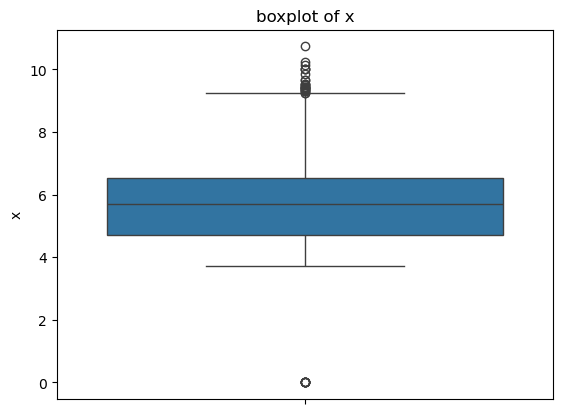

In [201]:
sns.boxplot(df['x'])
plt.title('boxplot of x')
plt.show()

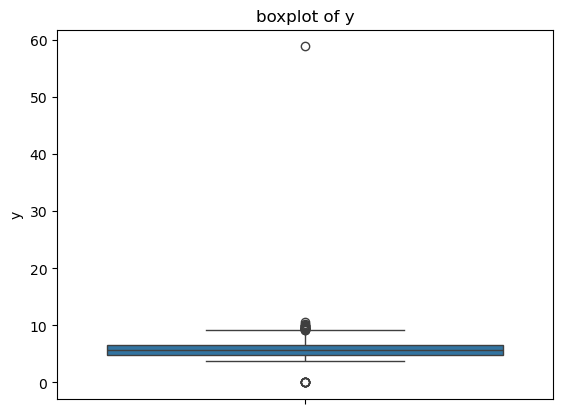

In [202]:
sns.boxplot(df['y'])
plt.title('boxplot of y')
plt.show()

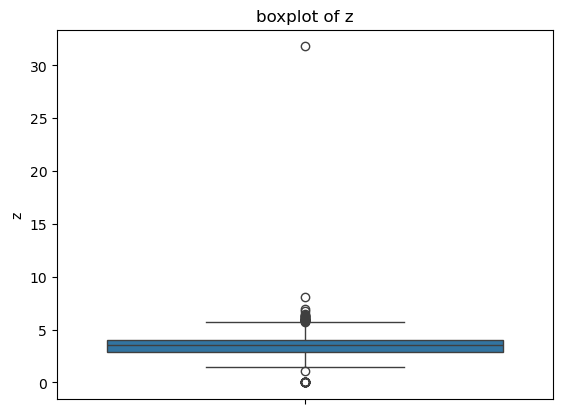

In [203]:
sns.boxplot(df['z'])
plt.title('boxplot of z')
plt.show()
#

For points x, y, z:
For x, it can be seen that the x-axis is close to 4 and less than days, while many outliers are shown after the fourth quantile and only one outlier below the first quantile (=0)
For the y and z axes, an outlier value greater than 30 is shown, and in the case of y, 60, and both also present an outlier value less than the fourth quantile of 0

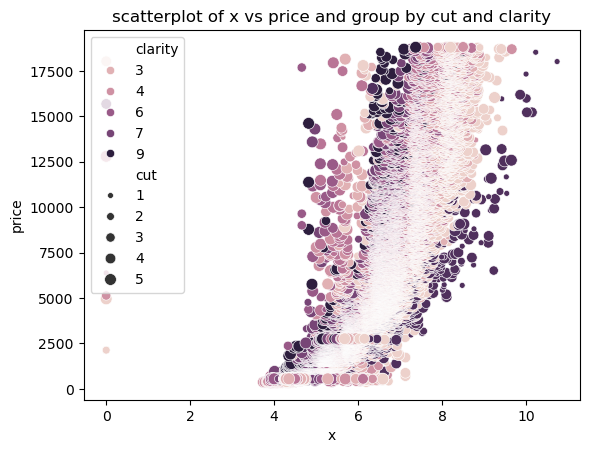

In [204]:
sns.scatterplot(data=df, x='x', y='price', hue='clarity', size='cut', hue_order=df['cut'].unique(), size_order=df['clarity'].unique())

plt.title('scatterplot of x vs price and group by cut and clarity')
plt.show()



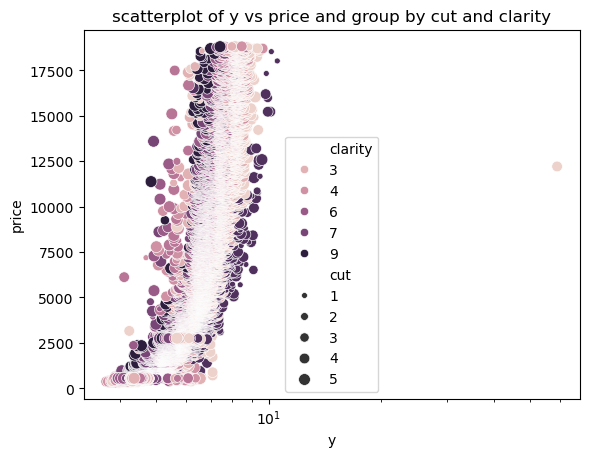

In [205]:
sns.scatterplot(data=df, x='y', y='price', hue='clarity', size='cut', hue_order=df['cut'].unique(), size_order=df['clarity'].unique())

plt.xscale('log')

plt.title('scatterplot of y vs price and group by cut and clarity')
plt.show()


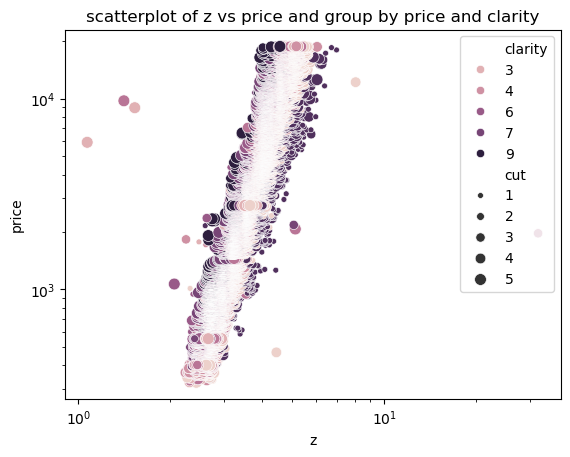

In [206]:
sns.scatterplot(data=df, x='z', y='price', hue='clarity', size='cut', hue_order=df['cut'].unique(), size_order=df['clarity'].unique())

plt.xscale('log')
plt.yscale('log')
plt.title('scatterplot of z vs price and group by price and clarity')
plt.show()

A linear correlation can be seen between registrations and registration price.

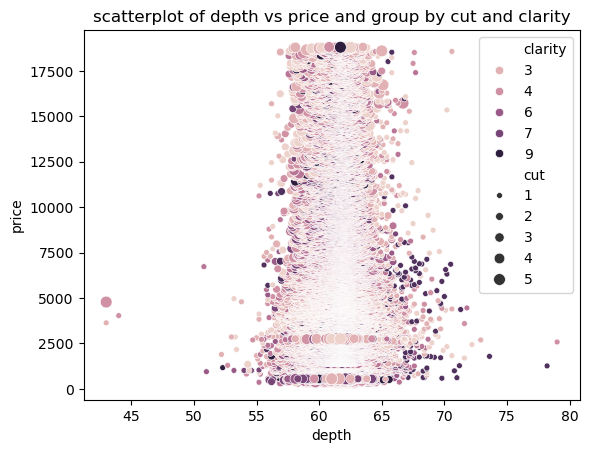

In [207]:
sns.scatterplot(data=df, x='depth', y='price', hue='clarity', size='cut', hue_order=df['cut'].unique(), size_order=df['clarity'].unique())

plt.title('scatterplot of depth vs price and group by cut and clarity')
plt.show()

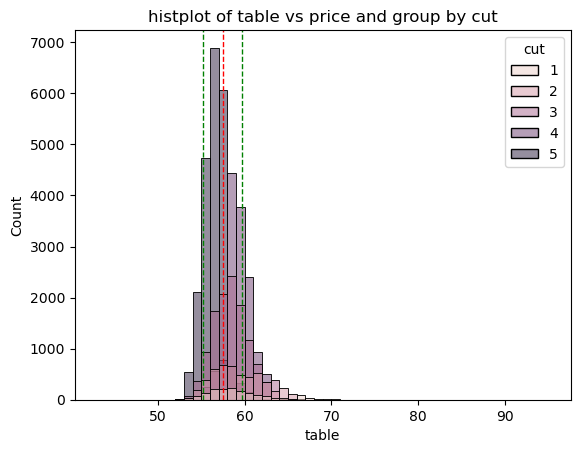

In [208]:
table_mean = df['table'].mean()
table_std = df['table'].std()

sns.histplot(data=df, x='table', hue='cut', binwidth=1)
plt.axvline(table_mean, color = 'red', linestyle='dashed', linewidth=1)
plt.axvline(table_mean + table_std, color = 'green', linestyle='dashed', linewidth=1)
plt.axvline(table_mean - table_std, color = 'green', linestyle='dashed', linewidth=1)

plt.title('histplot of table vs price and group by cut')
plt.show()

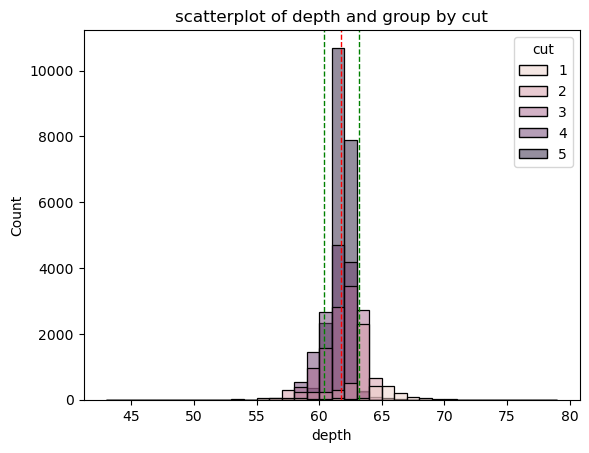

In [209]:
depth_mean = df['depth'].mean()
depth_std = df['depth'].std()

sns.histplot(data=df, x='depth', hue='cut', binwidth=1)
plt.axvline(depth_mean, color = 'red', linestyle='dashed', linewidth=1)
plt.axvline(depth_mean + depth_std, color = 'green', linestyle='dashed', linewidth=1)
plt.axvline(depth_mean - depth_std, color = 'green', linestyle='dashed', linewidth=1)

plt.title('scatterplot of depth and group by cut')
plt.show()

### We calculate some subjects (kurtosis, skewness)

In [210]:
depth_curtosis = df['depth'].kurtosis()
depth_asimetric = df['depth'].skew()

print("Curtosis of depth:", depth_curtosis)
print("Asimetric of depth:", depth_asimetric)

Curtosis of depth: 5.897416967574314
Asimetric of depth: -0.11773838506535449


We can see that since the kurtosis > 3 in this case 5.89, it means that it is leptokurtic and is very pronounced, on the other hand we can also see that the coefficient of skewness is negative asymmetric, since it is <0, although it is close to zero.


In [211]:
table_curtosis = df['table'].kurtosis()
table_asimetric = df['table'].skew()

print("Curtosis of table:", table_curtosis)
print("Asimetric of table:", table_asimetric)

Curtosis of table: 2.801712470259476
Asimetric of table: 0.7968352097880425


On the other hand, for the table values, the kurtosis is platykutic, that is, it is slightly flattened, and the coefficient of asymmetry tells us that it is slightly positively asymmetric due to its proximity to 0.

In [212]:
#cleaning data
df['latitude'] = pd.to_numeric(df['latitude'].str.replace('q', '.', regex=False), errors='coerce')

In [213]:
latitude_curtosis = df['latitude'].kurtosis()
latitude_asimetric = df['latitude'].skew()

print("Curtosis of latitude:", latitude_curtosis)
print("Asimetric of latitude:", latitude_asimetric)
#

Curtosis of latitude: 23.921111904893927
Asimetric of latitude: -3.7869259105934354


In the case of lartitude, kurtosis > 3, so the distribution is quite steep with respect to a Gaussian distribution and is negatively asymmetric with a considerable inclination to the values ​​on the left.

In [214]:
longitude_curtosis = df['longitude '].kurtosis()
longitude_asimetric = df['longitude '].skew()

print("Curtosis of longitude:", longitude_curtosis)
print("Asimetría of longitude:", longitude_asimetric)

Curtosis of longitude: 14.08548134538127
Asimetría of longitude: 3.1634096657527797


The length is analogously seen to be leptokurtic and the distribution is quite pronounced, as well as the asymmetry coefficient, which is inclined to the data to the right of the mean, which tells us about the present bias.

In [215]:
sperm_depth_price = stats.pearsonr(df['depth'], df['price'])
sperm_x_price = stats.pearsonr(df['x'], df['price'])
sperm_y_price = stats.pearsonr(df['y'], df['price'])
sperm_z_price = stats.pearsonr(df['z'], df['price'])
sperm_table_price = stats.pearsonr(df['table'], df['price'])
sperm_carat_price = stats.pearsonr(df['carat'], df['price'])
sperm_cut_price = stats.pearsonr(df['cut'], df['price'])
sperm_clarity_price = stats.pearsonr(df['clarity'], df['price'])
sperm_longitude_price = stats.pearsonr(df['longitude '], df['price'])

print("Spearman correlation between depth and price:", sperm_depth_price)
print("Spearman correlation between x and price:", sperm_x_price)
print("Spearman correlation between y and price:", sperm_y_price)
print("Spearman correlation between z and price:", sperm_z_price)
print("Spearman correlation between table and price:", sperm_table_price)
print("Spearman correlation between carat and price:", sperm_carat_price)
print("Spearman correlation between cut and price:", sperm_cut_price)
print("Spearman correlation between clarity and price:", sperm_clarity_price)
print("Spearman correlation between longitude and price:", sperm_longitude_price)

Spearman correlation between depth and price: PearsonRResult(statistic=-0.009667659389849636, pvalue=0.024761400751709222)
Spearman correlation between x and price: PearsonRResult(statistic=0.8766368452913159, pvalue=0.0)
Spearman correlation between y and price: PearsonRResult(statistic=0.8655357998272823, pvalue=0.0)
Spearman correlation between z and price: PearsonRResult(statistic=0.8612448942853834, pvalue=0.0)
Spearman correlation between table and price: PearsonRResult(statistic=0.127168298544959, pvalue=3.2103903340961213e-193)
Spearman correlation between carat and price: PearsonRResult(statistic=0.92158988761493, pvalue=0.0)
Spearman correlation between cut and price: PearsonRResult(statistic=-0.05350557175615806, pvalue=1.705909473510932e-35)
Spearman correlation between clarity and price: PearsonRResult(statistic=-0.14301278745578327, pvalue=2.4546337480957858e-244)
Spearman correlation between longitude and price: PearsonRResult(statistic=0.0034594575629722417, pvalue=0.42

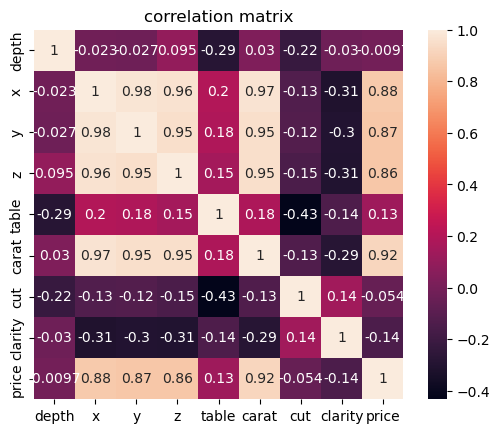

In [216]:
df_1 = df[['depth', 'x', 'y', 'z', 'table', 'carat', 'cut', 'clarity', 'price']]

sns.heatmap(df_1.corr(), square=True , annot=True, cbar=True)
plt.title('correlation matrix')
plt.show()

I appreciate the variables x, y, z and carat is the most significant and more correlation with price

# Pre-procesing data

## numerical variables and categorical variables

In [217]:
df_num = df.select_dtypes(include=['float64', 'int'])
df_num.head(5)

,carat,cut,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,5,2,61.5,55.0,326,3.95,3.98,2.43,39.881389,-83.093056
1,0.21,4,3,59.8,61.0,326,3.89,3.84,2.31,33.415000,-111.548889
2,0.23,2,5,56.9,65.0,327,4.05,4.07,2.31,40.167222,-105.101389
3,0.29,4,4,62.4,58.0,334,4.20,4.23,2.63,37.371111,-85.583056
4,0.31,2,2,63.3,58.0,335,4.34,4.35,2.75,48.539444,-121.745000


### Transform nominal variable

In [218]:
df_nominal = df['color']
df_nominal.head(5)

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: object

In [219]:
#using get_dummies to transform nominal values in multiple columns
df_nominal = pd.get_dummies(df_nominal, dtype=int)
df_nominal.head(5)

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


union all diferent DataFrame procesing

In [220]:
df_proces = pd.concat([
    df_nominal,
    df_num
], axis=1)

In [221]:
df_proces.head(5)

,D,E,F,G,H,I,J,carat,cut,clarity,depth,table,price,x,y,z,latitude,longitude
0,0,1,0,0,0,0,0,0.23,5,2,61.5,55.0,326,3.95,3.98,2.43,39.881389,-83.093056
1,0,1,0,0,0,0,0,0.21,4,3,59.8,61.0,326,3.89,3.84,2.31,33.415000,-111.548889
2,0,1,0,0,0,0,0,0.23,2,5,56.9,65.0,327,4.05,4.07,2.31,40.167222,-105.101389
3,0,0,0,0,0,1,0,0.29,4,4,62.4,58.0,334,4.20,4.23,2.63,37.371111,-85.583056
4,0,0,0,0,0,0,1,0.31,2,2,63.3,58.0,335,4.34,4.35,2.75,48.539444,-121.745000


In [222]:
y = df_proces['price']

In [223]:
df_proces = df_proces.drop('price', axis=1)

# Using pipeline

divide data into train 80% and test 20%

In [224]:
from sklearn.model_selection import train_test_split

#Separamos nuestros datos de entrenamiento (train) y de prueba(test)
X_train, X_test, y_train, y_test=train_test_split(df_proces,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=30)

I need to standardize values depth, table, x, y, z, latitud and longitud Because the range of data variates for different columns I use escalator MinMax

In [225]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor

In [226]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regresor', HistGradientBoostingRegressor())
])

change latitude value 0 for mean value

In [227]:
X_train[X_train['latitude'] == X_train['latitude'].isnull()]

,D,E,F,G,H,I,J,carat,cut,clarity,depth,table,x,y,z,latitude,longitude


In [228]:
X_train['latitude'] = X_train['latitude'].replace(0, df['latitude'].mean())

# Implementing ML Models to predict price

## HGBR

In [229]:
from sklearn.model_selection import GridSearchCV

print(HistGradientBoostingRegressor().__doc__)
HistGradientBoostingRegressor().get_params()

Histogram-based Gradient Boosting Regression Tree.

    This estimator is much faster than
    :class:`GradientBoostingRegressor<sklearn.ensemble.GradientBoostingRegressor>`
    for big datasets (n_samples >= 10 000).

    This estimator has native support for missing values (NaNs). During
    training, the tree grower learns at each split point whether samples
    with missing values should go to the left or right child, based on the
    potential gain. When predicting, samples with missing values are
    assigned to the left or right child consequently. If no missing values
    were encountered for a given feature during training, then samples with
    missing values are mapped to whichever child has the most samples.
    See :ref:`sphx_glr_auto_examples_ensemble_plot_hgbt_regression.py` for a
    usecase example of this feature.

    This implementation is inspired by
    `LightGBM <https://github.com/Microsoft/LightGBM>`_.

    Read more in the :ref:`User Guide <histogram_based_gra

{'categorical_features': 'warn',
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': None,
 'max_features': 1.0,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'quantile': None,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### optimizating HGBR with grindsearch

In [230]:
param_search_HGBR = {
    "regresor__loss": ['squared_error', 'absolute_error', 'gamma', 'quantile'],
    "regresor__learning_rate": [0.1,0.5,0.3],
    "regresor__max_iter": [100, 150, 200],
    "regresor__max_leaf_nodes": [10,20,31]
}

Define a function to calculate metrics and after take a desition to best model and hiperparameters

In [231]:
len(df)/5

10786.0

In [232]:
from sklearn.model_selection import cross_validate
import time

results = {}

def evaluated_model(est, X, y):
    result_est = cross_validate(est, X, y,
                     scoring="r2", n_jobs=-1, cv=5)
    return result_est

def show_results():
    results_df = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
        results_df[col+"_idx"] = results_df[col]/results_df[col].max()
    return results_df.sort_values(by=['test_score', 'fit_time'], ascending=[False, True])

In [233]:
HGBR_grid = GridSearchCV(pipe,
                    param_grid=param_search_HGBR,
                    scoring="r2", n_jobs=-1)


In [234]:
start_time = time.time()

HGBR_grid.fit( X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print(HGBR_grid.best_score_)
print(HGBR_grid.best_estimator_.get_params())

print(HGBR_grid.best_estimator_)
results["hgbr_gridsearch"] = evaluated_model(HGBR_grid.best_estimator_, X_train, y_train)

show_results()



C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\pipeline.py", line 473, in fi

Elapsed time: 27.572383880615234 seconds
0.9797635315233209
{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('regresor', HistGradientBoostingRegressor(loss='gamma', max_iter=200))], 'verbose': False, 'scaler': MinMaxScaler(), 'regresor': HistGradientBoostingRegressor(loss='gamma', max_iter=200), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'regresor__categorical_features': 'warn', 'regresor__early_stopping': 'auto', 'regresor__interaction_cst': None, 'regresor__l2_regularization': 0.0, 'regresor__learning_rate': 0.1, 'regresor__loss': 'gamma', 'regresor__max_bins': 255, 'regresor__max_depth': None, 'regresor__max_features': 1.0, 'regresor__max_iter': 200, 'regresor__max_leaf_nodes': 31, 'regresor__min_samples_leaf': 20, 'regresor__monotonic_cst': None, 'regresor__n_iter_no_change': 10, 'regresor__quantile': None, 'regresor__random_state': None, 'regresor__scoring': 'loss', 'regresor__tol': 1e-07, 'regresor__validation_fraction': 0.1, 'regresor__v

,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
hgbr_gridsearch,1.328618,0.185718,0.979873,1.0,1.0,1.0


## Fit the model with optimized hyperparameters

In [235]:
HGBR_best_model = HistGradientBoostingRegressor(loss = 'gamma', max_iter= 200)
HGBR_best_model.fit(X_train, y_train)


HistGradientBoostingRegressor(loss='gamma', max_iter=200)

In [236]:
predic_HGBR=HGBR_best_model.predict(X_test)
predic_HGBR

array([3088.50733333, 7860.59713502, 7952.28326342, ...,  789.42137032,
       1040.04234782, 3149.45671751])

### Calculated some metrics of predict

In [237]:
from sklearn import metrics

RMSE_predic = metrics.root_mean_squared_error(y_test, predic_HGBR)
MAE_predic = metrics.mean_absolute_error(y_test, predic_HGBR)
r2_predic = metrics.r2_score(y_test, predic_HGBR)

print("RMSE: ", RMSE_predic)
print("MAE: ", MAE_predic)
print("R2: ", r2_predic)

RMSE:  559.2746896967145
MAE:  278.5763618349094
R2:  0.9807281252987603


Apreciated r2 aprox 1, it's a good result to test data

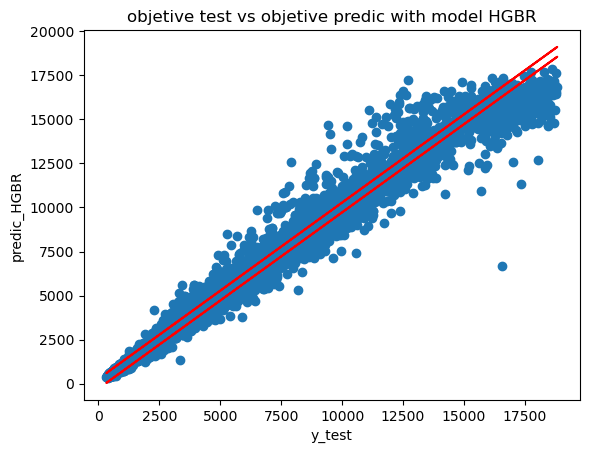

In [238]:
plt.scatter(y_test, predic_HGBR)
plt.plot(y_test, y_test + MAE_predic, color='red')
plt.plot(y_test, y_test - MAE_predic, color='red')


plt.xlabel('y_test')
plt.ylabel('predic_HGBR')
plt.title('objetive test vs objetive predic with model HGBR')
plt.show()

In the graph it can be observed that the comparison of the test data with respect to the predicted data maintains the linearity 1 to 1, which means that they are practically the same, except for some atypical values ​​that were not able to predict, which are the scattered points in (1000,2500).

This result can be confirmed by the RMSE and MAE values.

## Using random Forest Regressor


In [239]:
from sklearn.ensemble import RandomForestRegressor

pipe_rfr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regresor', RandomForestRegressor())
])



In [240]:
print(RandomForestRegressor().__doc__)
RandomForestRegressor().get_params()


    A random forest regressor.

    A random forest is a meta estimator that fits a number of decision tree
    regressors on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    Trees in the forest use the best split strategy, i.e. equivalent to passing
    `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    For a comparison between tree-based ensemble models see the example
    :ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 t

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [241]:
param_search_RFR = {
    "regresor__n_estimators": [100, 150, 200],
    "regresor__max_depth": [10, 20, 30],
    "regresor__bootstrap": [True, False],
    "regresor__criterion": ["squared_error", "absolute_error", "poisson"],
    }

In [242]:
from sklearn.model_selection import RandomizedSearchCV
RFR_grid = RandomizedSearchCV(pipe_rfr,
                    param_distributions=param_search_RFR,
                    scoring="r2", n_jobs=-1)

In [243]:
start_time = time.time()

RFR_grid.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print(RFR_grid.best_score_)
print(RFR_grid.best_estimator_.get_params())

print(RFR_grid.best_estimator_)
results["rfr_gridsearch"] = evaluated_model(RFR_grid.best_estimator_, X_train, y_train)

show_results()



C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
 

Elapsed time: 7037.572786331177 seconds
0.9799215854481673
{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('regresor', RandomForestRegressor(max_depth=30, n_estimators=200))], 'verbose': False, 'scaler': MinMaxScaler(), 'regresor': RandomForestRegressor(max_depth=30, n_estimators=200), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'regresor__bootstrap': True, 'regresor__ccp_alpha': 0.0, 'regresor__criterion': 'squared_error', 'regresor__max_depth': 30, 'regresor__max_features': 1.0, 'regresor__max_leaf_nodes': None, 'regresor__max_samples': None, 'regresor__min_impurity_decrease': 0.0, 'regresor__min_samples_leaf': 1, 'regresor__min_samples_split': 2, 'regresor__min_weight_fraction_leaf': 0.0, 'regresor__monotonic_cst': None, 'regresor__n_estimators': 200, 'regresor__n_jobs': None, 'regresor__oob_score': False, 'regresor__random_state': None, 'regresor__verbose': 0, 'regresor__warm_start': False}
Pipeline(steps=[('scaler', MinMaxScaler()),
      

,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
rfr_gridsearch,38.173889,0.432753,0.979891,1.000000,1.000000,1.000000
hgbr_gridsearch,1.328618,0.185718,0.979873,0.034804,0.429155,0.999981


# Train with best parameters RandomForest Regressor

**RandomForestRegressor(criterion='poisson', max_depth=20, n_estimators=200) with 0.979973 r2**

In [246]:
rfr_best_model = RandomForestRegressor(criterion='poisson', max_depth=30, n_estimators=200)
rfr_best_model.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', max_depth=30, n_estimators=200)

In [247]:
rfr_best_model = rfr_best_model.predict(X_test)
rfr_best_model

array([3260.42 , 7278.12 , 7864.375, ...,  786.61 , 1044.7  , 2937.085])

In [248]:
from sklearn import metrics

RMSE_predic_rfr = metrics.root_mean_squared_error(y_test, rfr_best_model)
MAE_predic_rfr = metrics.mean_absolute_error(y_test, rfr_best_model)
r2_predic_rfr = metrics.r2_score(y_test, rfr_best_model)

print("RMSE: ", RMSE_predic_rfr)
print("MAE: ", MAE_predic_rfr)
print("R2: ", r2_predic_rfr)

RMSE:  562.6932113412871
MAE:  279.6585723889272
R2:  0.9804918096951493


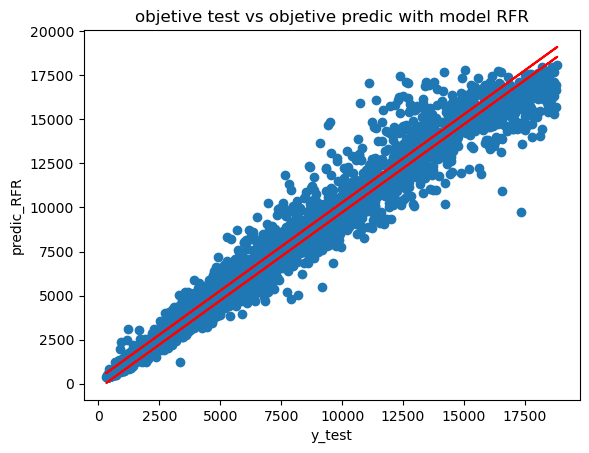

In [249]:
plt.scatter(y_test, rfr_best_model)
plt.plot(y_test, y_test + MAE_predic_rfr, color='red')
plt.plot(y_test, y_test - MAE_predic_rfr, color='red')


plt.xlabel('y_test')
plt.ylabel('predic_RFR')
plt.title('objetive test vs objetive predic with model RFR')
plt.show()

# ussing estandar regresor models

In [345]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

first, compare data before and after to drop 0 values

Remember x, y and z have 0's values

In [251]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'latitude', 'longitude '],
      dtype='object')

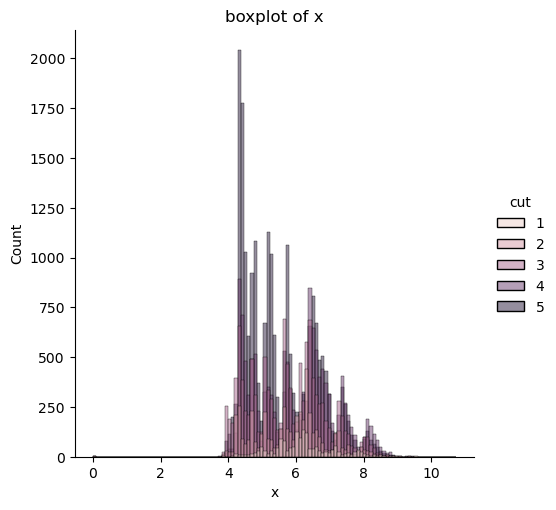

In [252]:
sns.displot(data = df, x = 'x', hue='cut')
plt.title('boxplot of x')
plt.show()

In [253]:
df_drop_0 = df

In [254]:
df_drop_0 = df_drop_0.drop(df_drop_0[df_drop_0['x'] == 0].index)
df_drop_0 = df_drop_0.drop(df_drop_0[df_drop_0['y'] == 0].index)
df_drop_0 = df_drop_0.drop(df_drop_0[df_drop_0['z'] == 0].index)

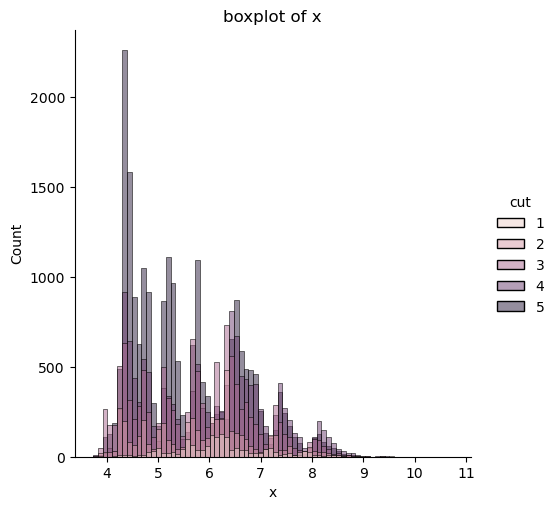

In [255]:
sns.displot(data = df_drop_0, x = 'x', hue = 'cut')
plt.title('boxplot of x')
plt.show()

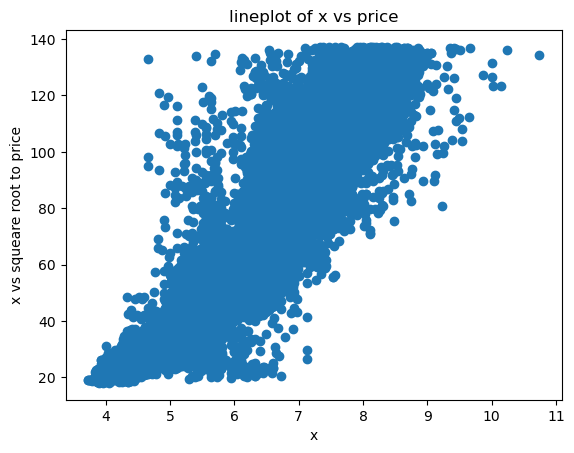

In [256]:
plt.scatter(df_drop_0['x'], np.sqrt(df_drop_0['price']))

plt.ylabel('x vs squeare root to price')
plt.xlabel('x')
plt.title('lineplot of x vs price')
plt.show()

# using PCA

In [307]:
df_pca=pd.DataFrame(df_pca)
df_pca.isnull().sum()
#df_pca[df_pca.isnull()]

D             0
E             0
F             0
G             0
H             0
I             0
J             0
carat         0
cut           0
clarity       0
depth         0
table         0
x             0
y             0
z             0
latitude      0
longitude     0
dtype: int64

In [308]:
df_pca[df_pca['latitude'].isna() == True]
df_pca = df_pca.drop(48185, axis=0)

KeyError: '[48185] not found in axis'

In [309]:
from sklearn.impute import SimpleImputer

pipe_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='mean',add_indicator=True)),
    ('scaler', MinMaxScaler()),
    ('pca', PCA())
])

In [310]:
df_pca = df_proces

In [311]:
X_train_reduce, X_test_reduce, y_train_reduce, y_test_reduce = train_test_split(df_pca,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=30)

In [312]:
df_pca.cov()

,D,E,F,G,H,I,J,carat,cut,clarity,depth,table,x,y,z,latitude,longitude
D,0.109832,-0.022816,-0.022222,-0.026291,-0.019341,-0.012624,-0.006538,-0.017605,0.002909,-0.054609,-0.006301,-0.006617,-0.039736,-0.039519,-0.024610,0.021127,0.037250
E,-0.022816,0.148651,-0.032136,-0.038020,-0.027969,-0.018256,-0.009454,-0.025447,-0.001783,-0.022043,-0.015431,0.006199,-0.057992,-0.057727,-0.035978,0.009911,-0.094262
F,-0.022222,-0.032136,0.145618,-0.037030,-0.027241,-0.017780,-0.009208,-0.010872,-0.003238,0.017546,-0.009399,-0.004201,-0.020653,-0.020267,-0.013158,-0.012284,-0.048977
G,-0.026291,-0.038020,-0.037030,0.165501,-0.032229,-0.021036,-0.010894,-0.005599,0.018190,0.091293,0.001820,-0.035174,-0.011257,-0.011223,-0.007057,0.010074,-0.022773
H,-0.019341,-0.027969,-0.027241,-0.032229,0.130271,-0.015475,-0.008015,0.017527,-0.004178,-0.011400,0.012261,0.009313,0.039223,0.038868,0.024204,-0.016536,0.071253
I,-0.012624,-0.018256,-0.017780,-0.021036,-0.015475,0.090402,-0.005231,0.023028,-0.002930,-0.007175,0.009859,0.012021,0.049474,0.049179,0.030841,-0.001022,-0.007226
J,-0.006538,-0.009454,-0.009208,-0.010894,-0.008015,-0.005231,0.049341,0.018969,-0.008969,-0.013610,0.007190,0.018459,0.040941,0.040691,0.025759,-0.011270,0.064736
carat,-0.017605,-0.025447,-0.010872,-0.005599,0.017527,0.023028,0.018969,0.224709,-0.071433,-0.238494,0.019672,0.192404,0.511225,0.511353,0.318946,-0.031868,0.097362
cut,0.002909,-0.001783,-0.003238,0.018190,-0.004178,-0.002930,-0.008969,-0.071433,1.246780,0.276004,-0.347373,-1.081366,-0.157771,-0.155776,-0.117657,0.002772,-0.422614
clarity,-0.054609,-0.022043,0.017546,0.091293,-0.011400,-0.007175,-0.013610,-0.238494,0.276004,3.078210,-0.072885,-0.540156,-0.613202,-0.605081,-0.378057,0.034791,-0.073903


In [320]:
pipe_pca.fit(X_train_reduce)

Pipeline(steps=[('imputer', SimpleImputer(add_indicator=True)),
                ('scaler', MinMaxScaler()), ('pca', PCA())])

In [321]:
pipe_pca.named_steps['pca'].explained_variance_ratio_

array([1.97787808e-01, 1.75104482e-01, 1.59572448e-01, 1.31068752e-01,
       1.04122668e-01, 8.21292236e-02, 5.76034900e-02, 5.44128359e-02,
       1.79403383e-02, 1.33901704e-02, 3.54586026e-03, 2.09328155e-03,
       8.13696828e-04, 3.44390075e-04, 2.98809000e-05, 2.25927645e-05,
       1.80807910e-05, 0.00000000e+00])

In [322]:
np.cumsum(pipe_pca.named_steps['pca'].explained_variance_ratio_)

array([0.19778781, 0.37289229, 0.53246474, 0.66353349, 0.76765616,
       0.84978538, 0.90738887, 0.96180171, 0.97974205, 0.99313222,
       0.99667808, 0.99877136, 0.99958506, 0.99992945, 0.99995933,
       0.99998192, 1.        , 1.        ])

with 10 components they hace 99% of cumulative variance and with 17 they have 100%

In [323]:
percent_varianze = pd.DataFrame({
    'n_comps': list(range(1, pipe_pca.named_steps['pca'].n_components_+1)),
    'cumulative_explained_variance': np.cumsum(pipe_pca.named_steps['pca'].explained_variance_ratio_)
})

In [324]:
percent_varianze

,n_comps,cumulative_explained_variance
0,1,0.197788
1,2,0.372892
2,3,0.532465
3,4,0.663533
4,5,0.767656
5,6,0.849785
6,7,0.907389
7,8,0.961802
8,9,0.979742
9,10,0.993132


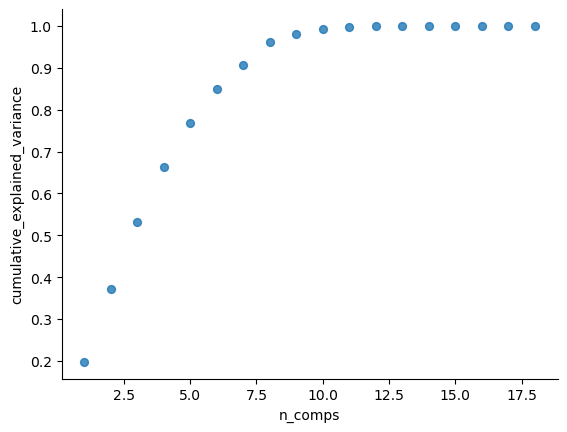

In [325]:
percent_varianze.plot(kind='scatter', x='n_comps', y='cumulative_explained_variance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Only needs max 10 components to explain 99% of the variance

In [326]:
pipe_pca.set_params(pca__n_components=10)

Pipeline(steps=[('imputer', SimpleImputer(add_indicator=True)),
                ('scaler', MinMaxScaler()), ('pca', PCA(n_components=10))])

In [336]:
X_train_reduce = pipe_pca.fit_transform(X_train_reduce)
X_test_reduce = pipe_pca.transform(X_test_reduce)

## linear regresor

In [337]:
from sklearn.linear_model import ElasticNet

print(ElasticNet().__doc__)
ElasticNet().get_params()

Linear regression with combined L1 and L2 priors as regularizer.

    Minimizes the objective function::

            1 / (2 * n_samples) * ||y - Xw||^2_2
            + alpha * l1_ratio * ||w||_1
            + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

    If you are interested in controlling the L1 and L2 penalty
    separately, keep in mind that this is equivalent to::

            a * ||w||_1 + 0.5 * b * ||w||_2^2

    where::

            alpha = a + b and l1_ratio = a / (a + b)

    The parameter l1_ratio corresponds to alpha in the glmnet R package while
    alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
    = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
    unless you supply your own sequence of alpha.

    Read more in the :ref:`User Guide <elastic_net>`.

    Parameters
    ----------
    alpha : float, default=1.0
        Constant that multiplies the penalty terms. Defaults to 1.0.
        See the notes for the exact mathema

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [347]:
print(SVR().__doc__)
SVR().get_params()

Epsilon-Support Vector Regression.

    The free parameters in the model are C and epsilon.

    The implementation is based on libsvm. The fit time complexity
    is more than quadratic with the number of samples which makes it hard
    to scale to datasets with more than a couple of 10000 samples. For large
    datasets consider using :class:`~sklearn.svm.LinearSVR` or
    :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
    :class:`~sklearn.kernel_approximation.Nystroem` transformer or
    other :ref:`kernel_approximation`.

    Read more in the :ref:`User Guide <svm_regression>`.

    Parameters
    ----------
    kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
         Specifies the kernel type to be used in the algorithm.
         If none is given, 'rbf' will be used. If a callable is given it is
         used to precompute the kernel matrix.

    degree : int, default=3
        Degree of the polynomial kernel 

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [348]:
print(MLPRegressor().__doc__)
MLPRegressor().get_params()

Multi-layer Perceptron regressor.

    This model optimizes the squared error using LBFGS or stochastic gradient
    descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
        Activation function for the hidden layer.

        - 'identity', no-op activation, useful to implement linear bottleneck,
          returns f(x) = x

        - 'logistic', the logistic sigmoid function,
          returns f(x) = 1 / (1 + exp(-x)).

        - 'tanh', the hyperbolic tan function,
          returns f(x) = tanh(x).

        - 'relu', the rectified linear unit function,
          returns f(x) = max(0, x)

    solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
        The solver for weight optimization.

        - 'lbfgs' is an optimizer in the family

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [350]:
param_search_elastic = {"alpha": [0,0.5,1.0,1.5],
                        "l1_ratio": [0,0.25,0.5,0.75,1]}
param_search_svr = {'kernel': ['poly', 'rbf', 'sigmoid'], 'degree': [1,2,3,5,10],
                    'gamma': ['scale', 1.5, 2.0, 5.0, 10.0]}
param_search_mlpr = {'hidden_layer_sizes':[100,150,200], 'activation':['logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'],
                    'alpha':[0.0001,0.001,0.01],'learning_rate':['constant', 'invscaling', 'adaptive']}

In [351]:
elastic_model = ElasticNet()
svr_model = SVR()
mlpr_model = MLPRegressor()

In [356]:
elastic_grid = GridSearchCV(elastic_model,
                    param_grid=param_search_elastic,
                    scoring="r2", n_jobs=-1)
svr_grid = RandomizedSearchCV(svr_model,
                param_distributions=param_search_svr,
                scoring="r2", n_jobs=-2)
mlpr_grid = RandomizedSearchCV(mlpr_model,
                param_distributions=param_search_mlpr,
                scoring="r2", n_jobs=-2)

In [344]:
start_time = time.time()

elastic_grid.fit(X_train_reduce,y_train_reduce)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print(elastic_grid.best_score_)
print(elastic_grid.best_estimator_.get_params())

print(elastic_grid.best_estimator_)
results["elastic_gridsearch"] = evaluated_model(elastic_grid.best_estimator_, X_train_reduce, y_train_reduce)

show_results()


Elapsed time: 2.3252947330474854 seconds
0.8547612174880624
{'alpha': 0.5, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 1, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
ElasticNet(alpha=0.5, l1_ratio=1)


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
rfr_gridsearch,38.173889,0.432753,0.979891,1.000000,1.000000,1.000000
hgbr_gridsearch,1.328618,0.185718,0.979873,0.034804,0.429155,0.999981
elastic_gridsearch,0.010864,0.000000,0.854761,0.000285,0.000000,0.872302


In [357]:
start_time = time.time()

svr_grid.fit(X_train_reduce,y_train_reduce)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print(svr_grid.best_score_)
print(svr_grid.best_estimator_.get_params())

print(svr_grid.best_estimator_)
results["svr_gridsearch"] = evaluated_model(svr_grid.best_estimator_, X_train_reduce, y_train_reduce)

show_results()


Elapsed time: 594.4956948757172 seconds
0.9288083409700387
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 10, 'epsilon': 0.1, 'gamma': 2.0, 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVR(degree=10, gamma=2.0, kernel='poly')


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
rfr_gridsearch,38.173889,0.432753,0.979891,0.300717,0.074043,1.000000
hgbr_gridsearch,1.328618,0.185718,0.979873,0.010466,0.031776,0.999981
svr_gridsearch,126.942759,5.844648,0.928808,1.000000,1.000000,0.947869
elastic_gridsearch,0.010864,0.000000,0.854761,0.000086,0.000000,0.872302


In [358]:
start_time = time.time()

mlpr_grid.fit(X_train_reduce,y_train_reduce)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print(mlpr_grid.best_score_)
print(mlpr_grid.best_estimator_.get_params())

print(mlpr_grid.best_estimator_)
results["mlpr_gridsearch"] = evaluated_model(mlpr_grid.best_estimator_, X_train_reduce, y_train_reduce)

show_results()

C:\Users\CHOX\anaconda3\envs\ia\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Elapsed time: 151.08134818077087 seconds
0.9518147904663585
{'activation': 'logistic', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=100,
             solver='lbfgs')


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
rfr_gridsearch,38.173889,0.432753,0.979891,0.300717,0.074043,1.000000
hgbr_gridsearch,1.328618,0.185718,0.979873,0.010466,0.031776,0.999981
mlpr_gridsearch,30.876935,0.013820,0.954578,0.243235,0.002365,0.974167
svr_gridsearch,126.942759,5.844648,0.928808,1.000000,1.000000,0.947869
elastic_gridsearch,0.010864,0.000000,0.854761,0.000086,0.000000,0.872302


## the Histogram Gradient Boosting Regressor is the best model to predict values and the lower than random forest to fit time
